In [5]:
!uv venv && uv pip install -q ipykernel matplotlib numpy pandas

Using CPython 3.11.11 interpreter at: /usr/bin/python3
Creating virtual environment at: .venv
Activate with: source .venv/bin/activate.fish


In [6]:
outputs = {
    "CPU v1": "output/cpu_v1.json",
    "CPU v2": "output/cpu_v2.json",
    "OpenMP": "output/omp.json",
    "OpenCV": "output/ocv.json",
    "SIMD": "output/simd.json",
    "Buffer": "output/buf.json",
    "USM v2": "output/usm_v2.json",
    "USM v3": "output/usm_v3.json",
    "USM v4": "output/usm_v4.json",
    "CUDA": "output/cuda.json",
}

In [7]:
import json

data = {}
for name, path in outputs.items():
    with open(path) as f:
        data[name] = json.load(f)


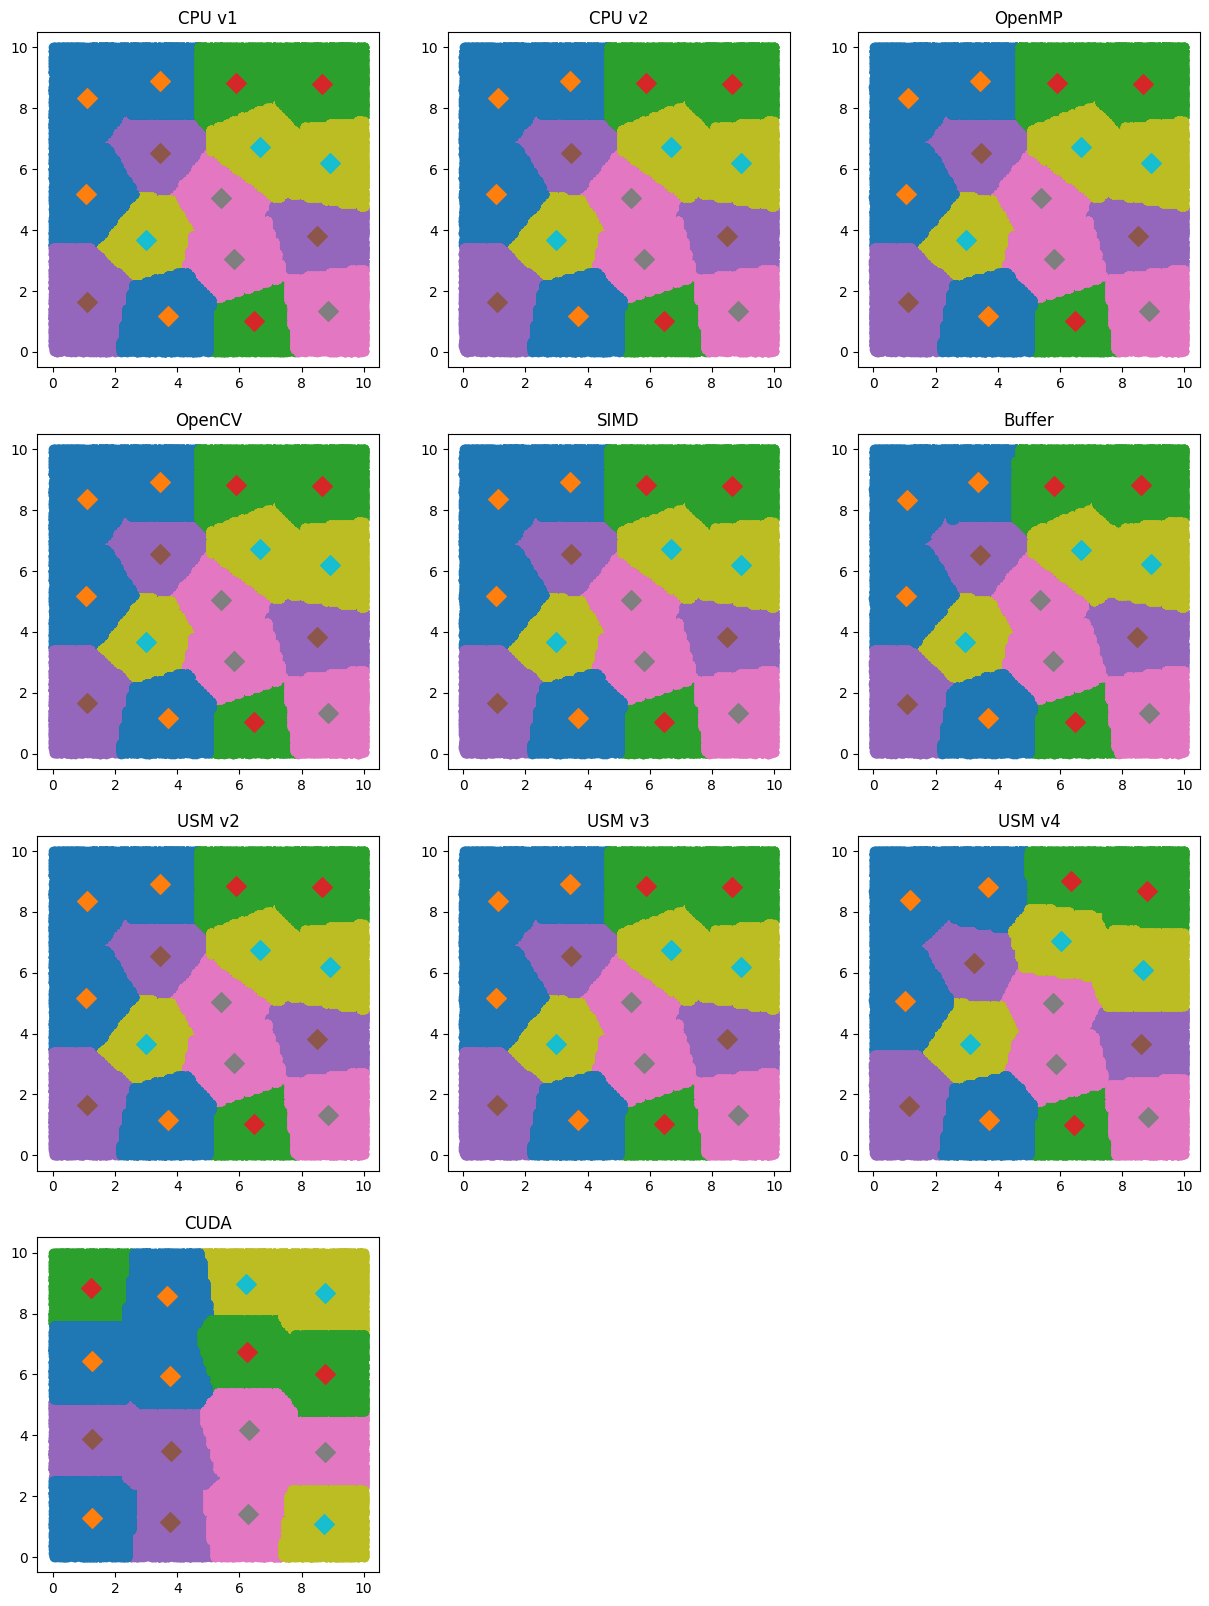

In [8]:
import matplotlib.pyplot as plt
from math import ceil


ncols = 3
nrows = ceil(len(data) / ncols)

fig = plt.figure(figsize=(5 * ncols, 5 * nrows))


def plot_cluster(idx, title, clusters):
    ax = fig.add_subplot(nrows, ncols, idx)
    ax.set_title(title)

    for cluster in clusters:
        centroid = cluster["c"]

        xs = [x[0] for x in cluster["a"]]
        ys = [x[1] for x in cluster["a"]]

        ax.scatter(xs, ys)
        ax.scatter(centroid[0], centroid[1], marker="D", s=100)


for i, (name, d) in enumerate(data.items()):
    plot_cluster(i + 1, name, d)

plt.show()